<a href="https://colab.research.google.com/github/ZdzislawJanczak/Load-data/blob/main/Pomiary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [41]:
common_path = '/content/drive/MyDrive/Colab Notebooks/raw/'
akg_df = pd.read_csv(common_path + 'AKG_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
edifier_df = pd.read_csv(common_path + 'Edifier_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
ol_df = pd.read_csv(common_path + 'OL_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])
sony_df = pd.read_csv(common_path + 'Sony_1-200k.csv', usecols=[0, 1, 3], names=['Frequency', 'Amplitude', 'Phase'])

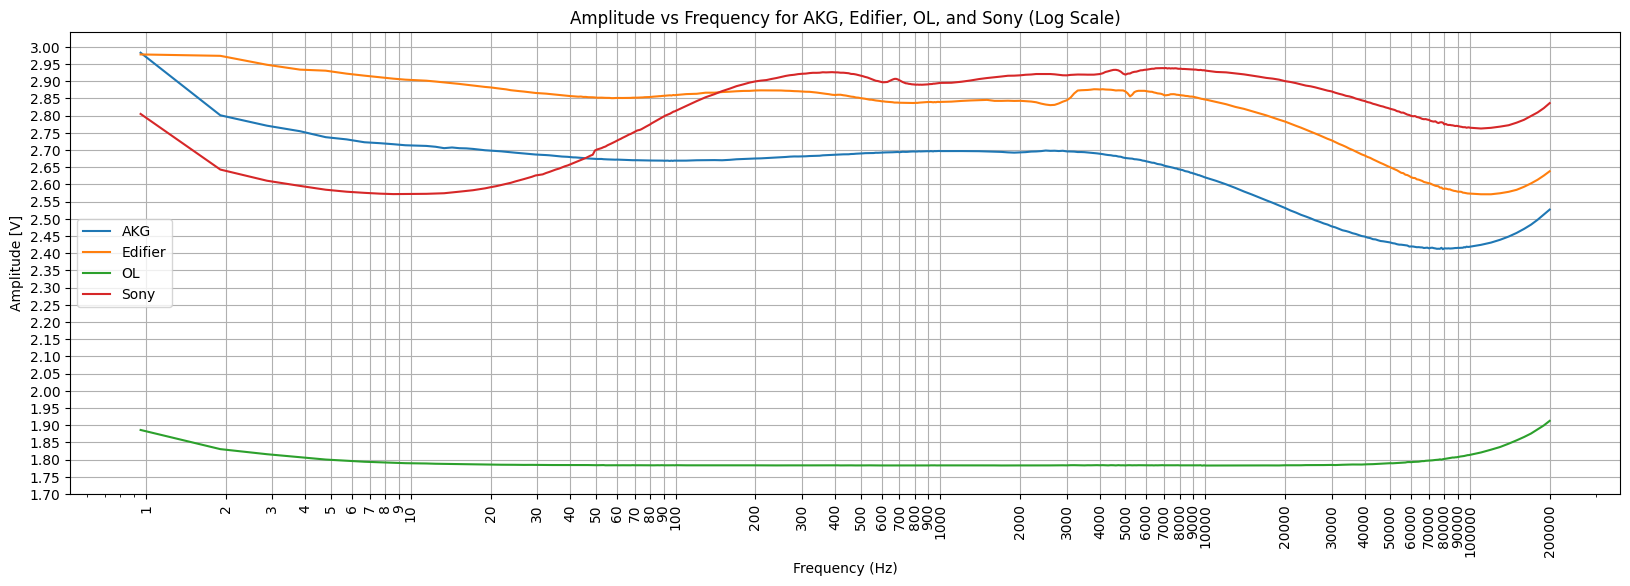

In [42]:
plt.figure(figsize=(20, 6))

plt.plot(akg_df['Frequency'], akg_df['Amplitude'], label='AKG')
plt.plot(edifier_df['Frequency'], edifier_df['Amplitude'], label='Edifier')
plt.plot(ol_df['Frequency'], ol_df['Amplitude'], label='OL')
plt.plot(sony_df['Frequency'], sony_df['Amplitude'], label='Sony')

plt.xscale('log')
# Define the frequency intervals and steps for custom ticks
freq_intervals = [(1, 10, 1), (10, 100, 10), (100, 1000, 100), (1000, 10000, 1000), (10000, 100000, 10000), (100000, 200000, 100000)]
freq_ticks = []
for start, end, step in freq_intervals:
    freq_ticks.extend(np.arange(start, end + step, step))
freq_ticks = sorted(list(set(freq_ticks)))
plt.xticks(freq_ticks, [str(int(tick)) for tick in freq_ticks], rotation='vertical') # Set custom ticks and labels vertically


plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [V]')
plt.title('Amplitude vs Frequency for AKG, Edifier, OL, and Sony (Log Scale)')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(1.70, plt.ylim()[1], 0.05)) # Add more ticks on the y-axis for Amplitude
plt.show()

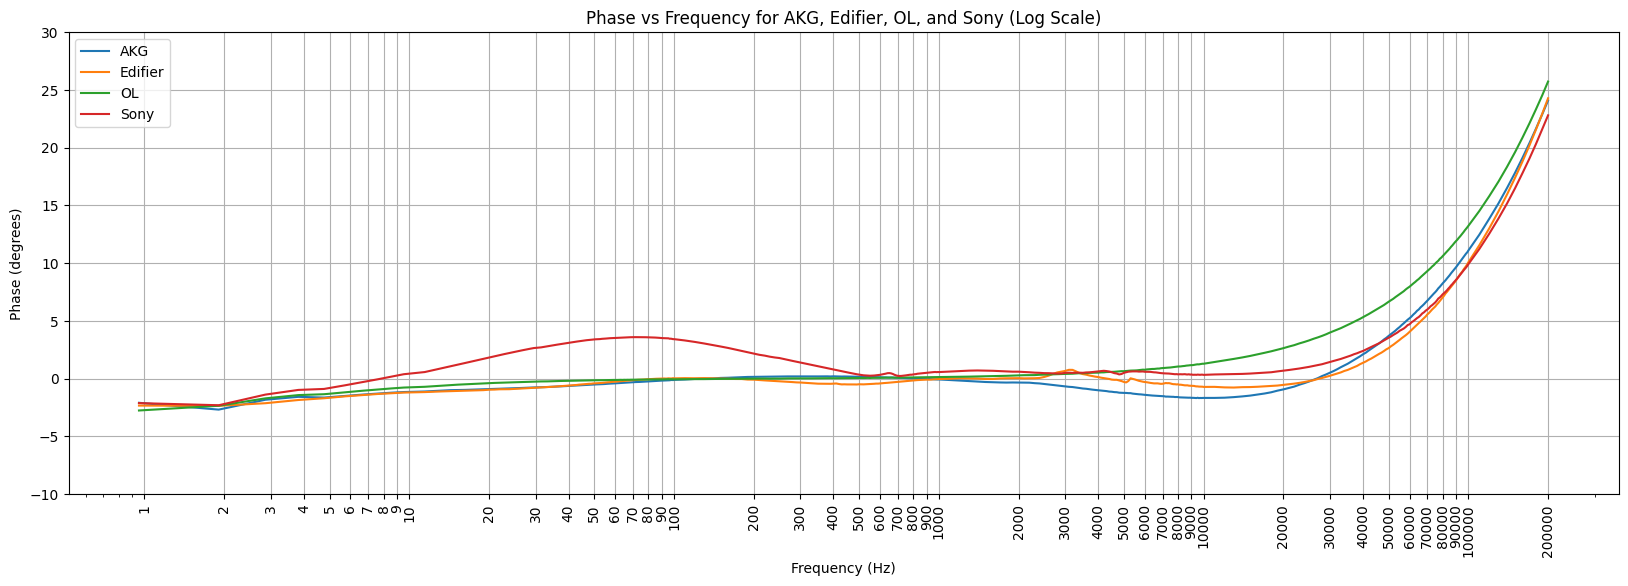

In [43]:
plt.figure(figsize=(20, 6))

plt.plot(akg_df['Frequency'], akg_df['Phase'], label='AKG')
plt.plot(edifier_df['Frequency'], edifier_df['Phase'], label='Edifier')
plt.plot(ol_df['Frequency'], ol_df['Phase'], label='OL')
plt.plot(sony_df['Frequency'], sony_df['Phase'], label='Sony')

plt.xscale('log')
# Define the frequency intervals and steps for custom ticks
freq_intervals = [(1, 10, 1), (10, 100, 10), (100, 1000, 100), (1000, 10000, 1000), (10000, 100000, 10000), (100000, 200000, 100000)]
freq_ticks = []
for start, end, step in freq_intervals:
    freq_ticks.extend(np.arange(start, end + step, step))
freq_ticks = sorted(list(set(freq_ticks)))
plt.xticks(freq_ticks, [str(int(tick)) for tick in freq_ticks], rotation='vertical') # Set custom ticks and labels vertically

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Phase vs Frequency for AKG, Edifier, OL, and Sony (Log Scale)')
plt.legend()
plt.grid(True)
plt.ylim(-10, 30) # Adjusting y-limit to better fit the phase data
plt.yticks(np.arange(-10, 31, 5)) # Adjusting y-ticks for Phase
plt.show()

In [44]:
akg_ol_amplitude_diff = akg_df['Amplitude'] - ol_df['Amplitude']
edifier_ol_amplitude_diff = edifier_df['Amplitude'] - ol_df['Amplitude']
sony_ol_amplitude_diff = sony_df['Amplitude'] - ol_df['Amplitude']

In [45]:
akg_ol_phase_diff = akg_df['Phase'] - ol_df['Phase']
edifier_ol_phase_diff = edifier_df['Phase'] - ol_df['Phase']
sony_ol_phase_diff = sony_df['Phase'] - ol_df['Phase']

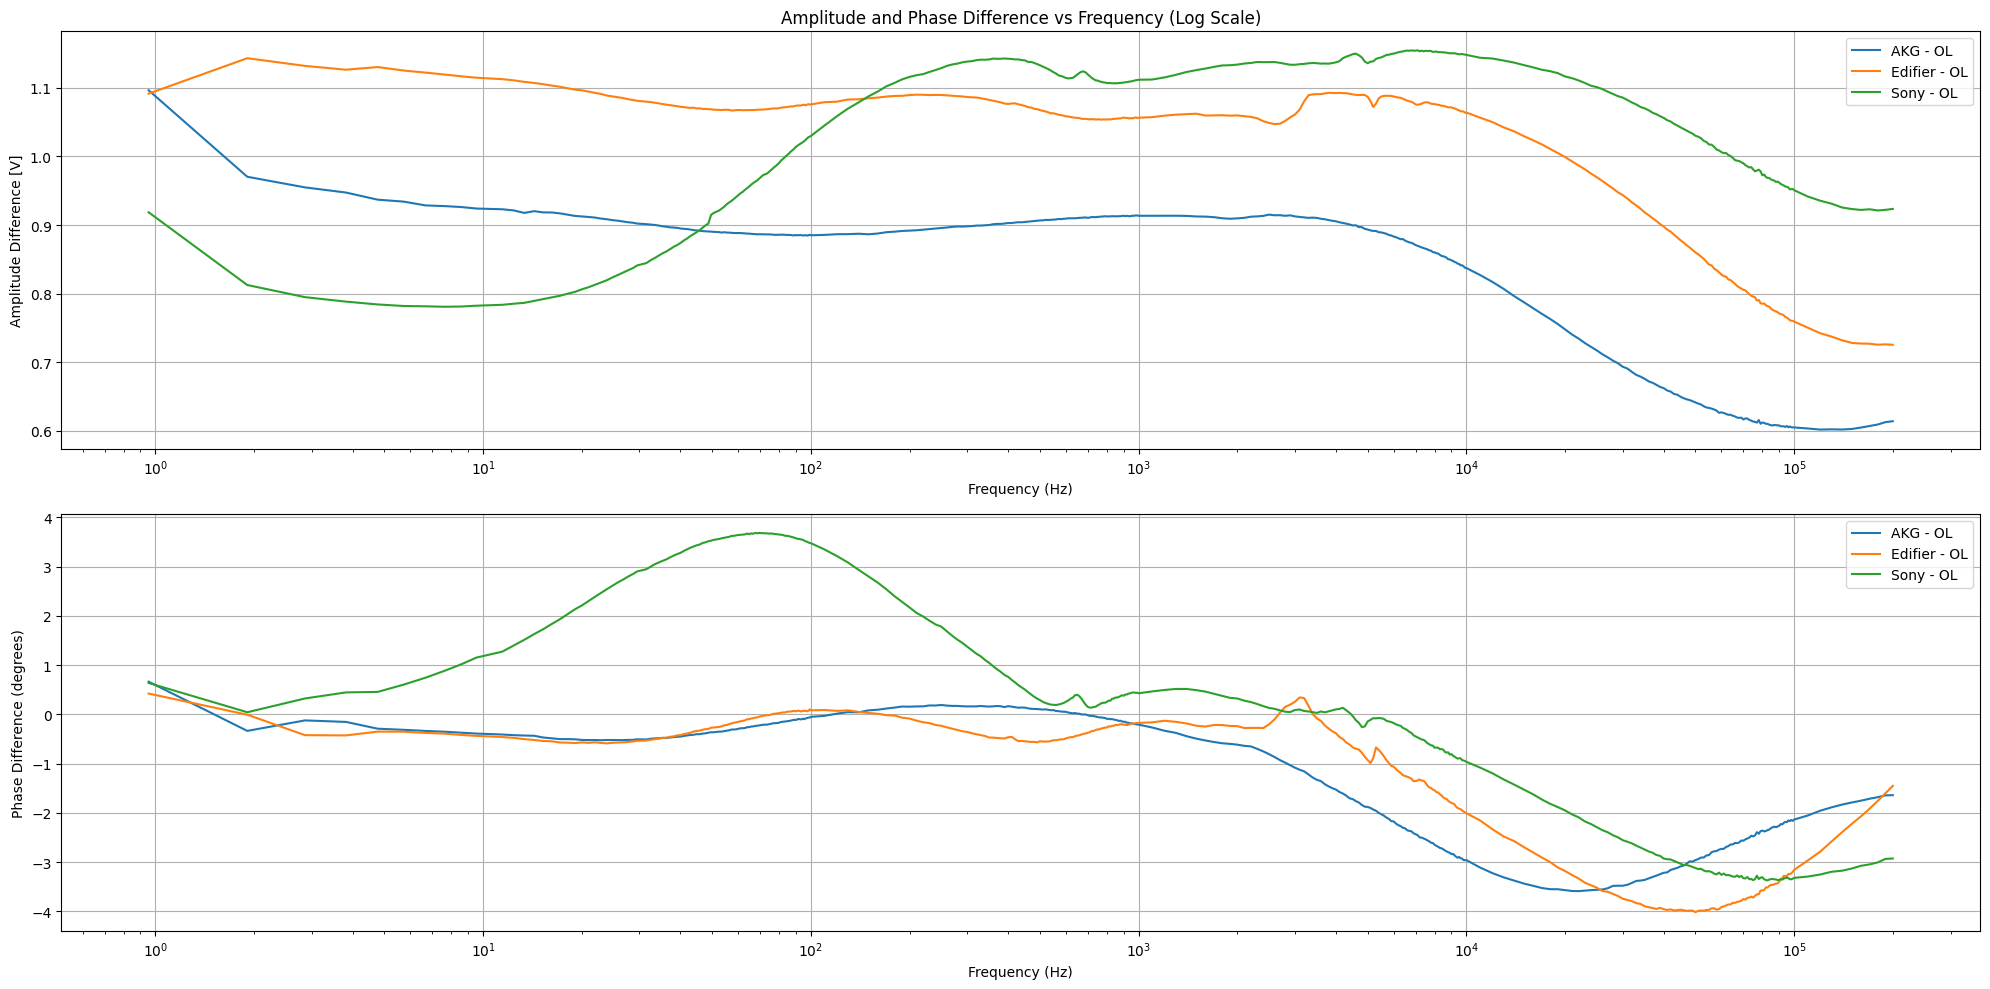

In [46]:
plt.figure(figsize=(20, 10)) # Increased the figure height to accommodate two plots

# Amplitude Difference Plot (Top Subplot)
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(akg_df['Frequency'], akg_ol_amplitude_diff, label='AKG - OL')
plt.plot(edifier_df['Frequency'], edifier_ol_amplitude_diff, label='Edifier - OL')
plt.plot(sony_df['Frequency'], sony_ol_amplitude_diff, label='Sony - OL')

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Difference [V]')
plt.title('Amplitude and Phase Difference vs Frequency (Log Scale)')
plt.legend()
plt.grid(True)

# Phase Difference Plot (Bottom Subplot)
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(akg_df['Frequency'], akg_ol_phase_diff, label='AKG - OL')
plt.plot(edifier_df['Frequency'], edifier_ol_phase_diff, label='Edifier - OL')
plt.plot(sony_df['Frequency'], sony_ol_phase_diff, label='Sony - OL')

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (degrees)')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()